# Análisis Exploratorio de Datos: Salarios en la Industria Tecnológica

**Autor:** [Diego Gamarra]
**Fecha:** [7 de febrero 2025]

## Introducción

En este proyecto, realizaremos un análisis exploratorio de datos (EDA) completo sobre un conjunto de datos que contiene información sobre salarios en la industria tecnológica. El objetivo es obtener una comprensión profunda de los datos, identificar patrones, relaciones y características relevantes que nos permitan entender mejor el panorama de los salarios en este sector. Además, aplicaremos técnicas estadísticas para extraer información significativa y formular conclusiones basadas en la evidencia.

**Conjunto de Datos:**

El conjunto de datos contiene las siguientes variables:

-   `work_year`: Año en que se pagó el salario.
-   `experience_level`: Nivel de experiencia en el trabajo durante el año.
-   `employment_type`: Tipo de empleo para el puesto.
-   `job_title`: El rol en el que se trabajó durante el año.
-   `salary`: El monto total del salario bruto pagado.
-   `salary_currency`: La moneda del salario pagado como un código de moneda ISO 4217.
-   `salary_in_usd`: El salario en USD (tasa de cambio dividida por la tasa promedio de USD para el año correspondiente a través de fxdata.foorilla.com).
-   `employee_residence`: País de residencia principal del empleado durante el año laboral como un código de país ISO 3166.
-   `remote_ratio`: La cantidad total de trabajo realizado de forma remota.
-   `company_location`: El país de la oficina principal del empleador o sucursal contratante.
-   `company_size`: El número promedio de personas que trabajaron para la empresa durante el año.

**Objetivos:**

-   Realizar un análisis exploratorio completo del conjunto de datos.
-   Identificar las características más relevantes que influyen en los salarios.
-   Formular conclusiones basadas en el análisis estadístico.
-   Utilizar técnicas de visualización para comunicar los hallazgos de manera efectiva.
-   Aplicar imputación de datos, transformación, normalización y estandarización cuando sea necesario.
-   Realizar análisis univariado, multivariado y estadístico.


## 1. Importar Librerías

En esta sección, importaremos las librerías necesarias para el análisis de datos.

**Instrucción:** Importa las librerías `pandas`, `numpy`, `matplotlib.pyplot`, `seaborn`, `scipy.stats` y de `sklearn` las de escalado y `ttest_1samp`.

In [78]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import kurtosis, skew
from sklearn.preprocessing import StandardScaler


## 2. Carga y Descripción General del Conjunto de Datos

En esta sección, cargaremos el conjunto de datos y obtendremos una descripción general de su estructura y contenido.

**Instrucción:** Carga el conjunto de datos desde el archivo CSV proporcionado (o crea un DataFrame de ejemplo con los datos proporcionados en la Introducción) en un DataFrame de `pandas` llamado `df`.

In [79]:
df = pd.read_csv("data/global_tech_salary.csv")

df_respaldo = df.copy()

**Instrucción:** Muestra las primeras 5 filas del DataFrame `df`.

In [80]:
df.head()

,work_year,experience_level,employment_type,job_title,salary,salary_currency,salary_in_usd,employee_residence,remote_ratio,company_location,company_size
0,2023,MI,FT,Data Analyst,165000,USD,165000,AU,0,AU,M
1,2023,MI,FT,Data Analyst,70000,USD,70000,US,100,US,M
2,2024,MI,FT,Machine Learning Engineer,85000,EUR,94444,IE,100,IE,M
3,2024,SE,FT,Data Scientist,92700,USD,92700,US,0,US,M
4,2023,MI,FT,Research Engineer,150000,USD,150000,US,0,US,M


**Instrucción:** Utiliza el método `info()` para obtener un resumen del DataFrame, incluyendo los tipos de datos y la cantidad de valores no nulos en cada columna.

In [81]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 11 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   work_year           5000 non-null   int64 
 1   experience_level    5000 non-null   object
 2   employment_type     5000 non-null   object
 3   job_title           5000 non-null   object
 4   salary              5000 non-null   int64 
 5   salary_currency     5000 non-null   object
 6   salary_in_usd       5000 non-null   int64 
 7   employee_residence  5000 non-null   object
 8   remote_ratio        5000 non-null   int64 
 9   company_location    5000 non-null   object
 10  company_size        5000 non-null   object
dtypes: int64(4), object(7)
memory usage: 429.8+ KB


-Vemos que no contamos con valores nulos, no se necesitará limpieza

**Instrucción:** Utiliza el método `describe()` para obtener estadísticas descriptivas de las variables numéricas del DataFrame.

In [82]:
df.describe()

,work_year,salary,salary_in_usd,remote_ratio
count,5000.000000,5.000000e+03,5000.000000,5000.000000
mean,2023.136400,1.588089e+05,148924.465200,32.800000
std,0.696198,2.072854e+05,66986.391667,46.492928
min,2020.000000,1.500000e+04,15000.000000,0.000000
25%,2023.000000,1.019408e+05,100573.250000,0.000000
50%,2023.000000,1.420000e+05,140304.000000,0.000000
75%,2024.000000,1.870000e+05,185900.000000,100.000000
max,2024.000000,8.500000e+06,750000.000000,100.000000


- En la columna salary veo algunas letras, no sé si se refiere a que es un número muy grande 
- En la columna salario en dolares, vemos una desviación estandar bastante grane

## 3. Análisis de Tipos de Variables y Distribuciones

En esta sección, analizaremos los tipos de variables presentes en el conjunto de datos y visualizaremos sus distribuciones.


**Instrucción:** Determina el tipo de variable de cada columna (numérica, categórica, etc.).

In [83]:
df.shape

(5000, 11)

In [84]:
df.columns

Index(['work_year', 'experience_level', 'employment_type', 'job_title',
       'salary', 'salary_currency', 'salary_in_usd', 'employee_residence',
       'remote_ratio', 'company_location', 'company_size'],
      dtype='object')

#### Categoricas:
- job_title
- company_location
- experience_level
- employment_type	
- salary_currency
- company_size
- employee_residence
#### Numericas:
- salary
- salary_in_usd
- remote_ratio
- work_year


**Instrucción:** Crea histogramas para visualizar la distribución de las variables numéricas (`salary`, `salary_in_usd`).

### Tenemos en cuenta las distintas monedas para un gráfico correcto:

In [85]:
df["salario_escalado"] = (df["salary"] - df["salary"].min()) / (df["salary"].max() - df["salary"].min())  #Escalar el salarlio, en este caso no tan útil

df["salary_currency"].value_counts() #Vemos todos los tipos de monedas


salary_currency
USD    4623
GBP     171
EUR     151
CAD      20
INR      15
AUD       4
PLN       3
SGD       2
DKK       2
THB       2
PHP       1
NZD       1
MXN       1
JPY       1
CHF       1
BRL       1
TRY       1
Name: count, dtype: int64

### Histogramas para la variable salary (Escalado y sin  escalar)


 Curtosis: 761.2468145497207

 Asimetría: 23.90462426363539


<Axes: xlabel='salary', ylabel='Count'>

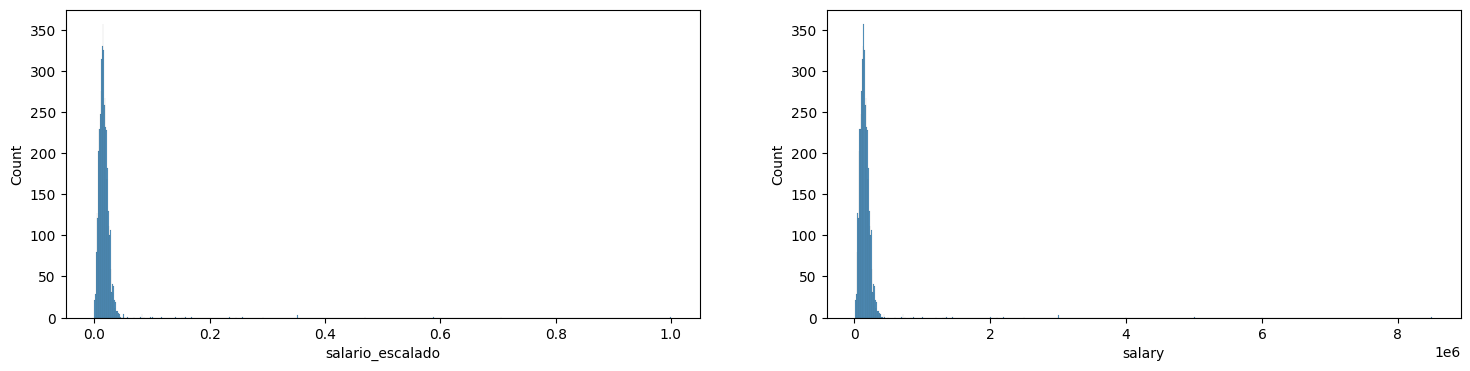

In [86]:

    
plt.figure(figsize=(18,4))

plt.subplot(1,2,1)
sns.histplot(
    data=df,
    x = "salario_escalado",  #De igual manera al escalarlo no sale un gráfico legible
    ##kde=True
)

print(f"\n Curtosis: {kurtosis(df["salario_escalado"])}")
print(f"\n Asimetría: {skew(df["salario_escalado"])}")


plt.subplot(1,2,2)
sns.histplot(
    data=df,
    x = "salary",  #De igual manera al escalarlo no sale un gráfico legible
    ##kde=True
)


- Una curtosis super alta, nos indica un pico gigante de los datos, se debe a los distintos tipos de moneda. La gran mayoria siendo dolares, por eso el pico tan grande. Por lo mencionado anteriormente, se ve un sesgo positivo enorme

### Boxplot para salary (escalado y sin escalar)

<Axes: xlabel='salary'>

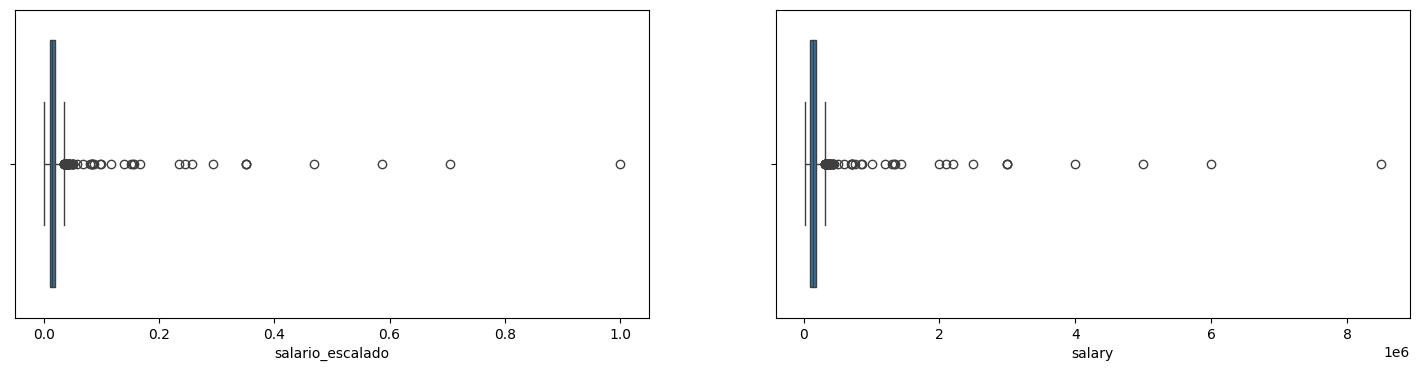

In [87]:
plt.figure(figsize=(18,4))

plt.subplot(1,2,1)

sns.boxplot(
    data=df,
    x = "salario_escalado",
)

plt.subplot(1,2,2)
sns.boxplot(
    data=df,
    x = "salary",
)


- Misma observación que con el histograma, debido a las distintas monedas y la concentraciond e salarios en dólares, se ve que la mayoria se concentra en un rango muy bajo, que en realidad no necesariamente sería un sueldo bajo, es bajo con respecto a la escala del gráfico debido a las distintas monedas

- No es lo mismo 50.000 dolares que 50.000 dolares pero en pesos o bolivares, solo por dar un ejemplo, a eso se debe el sesgo y el gráfico

### Gráficos con las monedas filtradas (USD)


 Curtosis: 6.010668651488791

 Asimetría: 1.2806301698138658


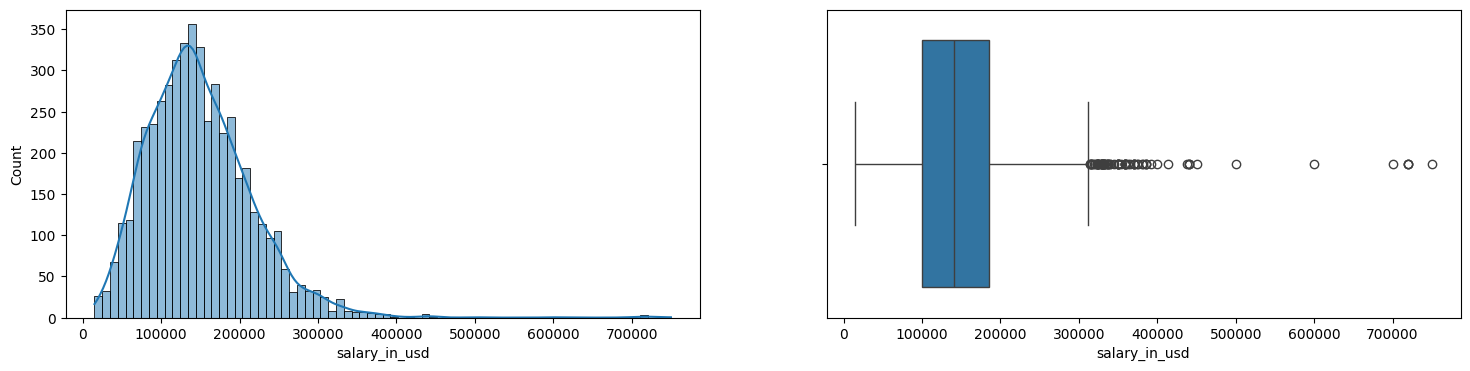

In [88]:
plt.figure(figsize=(18,4))

plt.subplot(1,2,1)

sns.histplot(
    data=df,
    x = "salary_in_usd",
    kde=True
)

print(f"\n Curtosis: {kurtosis((df["salary_in_usd"]))}")
print(f"\n Asimetría: {skew(df["salary_in_usd"])}")

plt.subplot(1,2,2)

sns.boxplot(
    data=df,
    x = "salary_in_usd",
)

plt.show()

#### Histograma:
- Acá sí se ven resultados realistas y entendibles debido a estandarizacion en dolares
- Se ve una curtosis de 6, que indica una distribucion ligeramente cercana a la normal.  
- Una asimetría que indica un ligero sesgo positivo
#### Boxplot:
- El 50% de los salarios rondan los 100.000 y 180.000 dolares aproximadamente
- Se ve que la mediana es aproximadamente 140.000, esto dice que la mitad de los sueldos estan por debajo de 140mil y por encima de 140mil
- Se ve una importante cantidad de outliers entre poco más de 300.000 y poco más de 700.000

**Instrucción:** Crea gráficos de barras para visualizar la distribución de las variables categóricas (`experience_level`, `employment_type`, `job_title`, `employee_residence`, `company_location`, `company_size`).

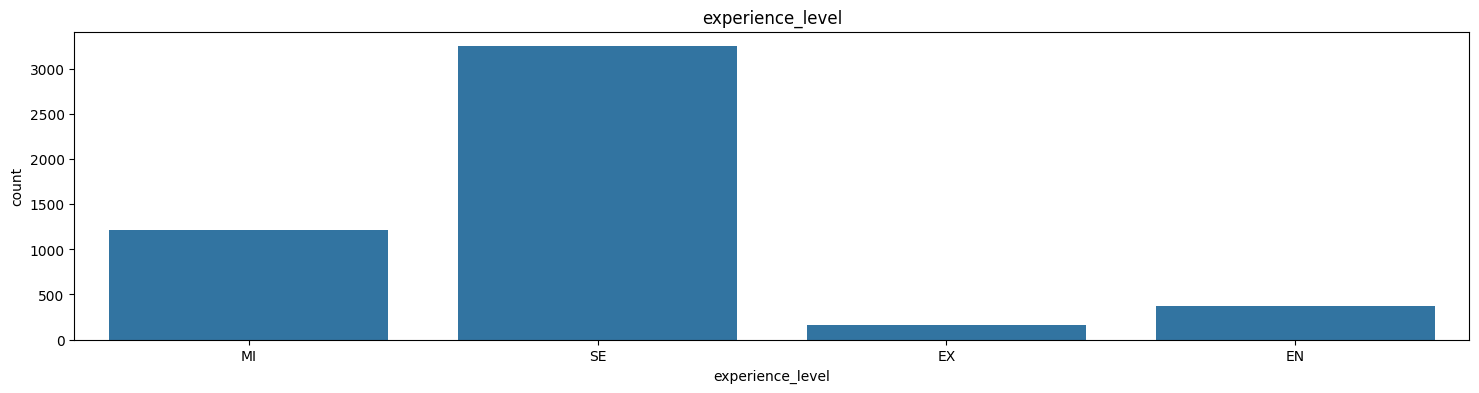

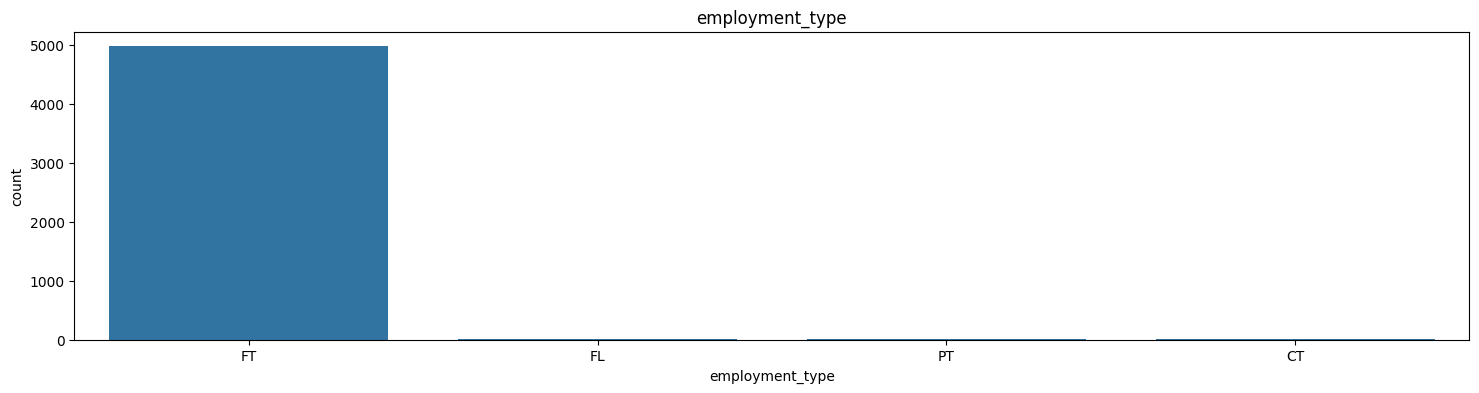

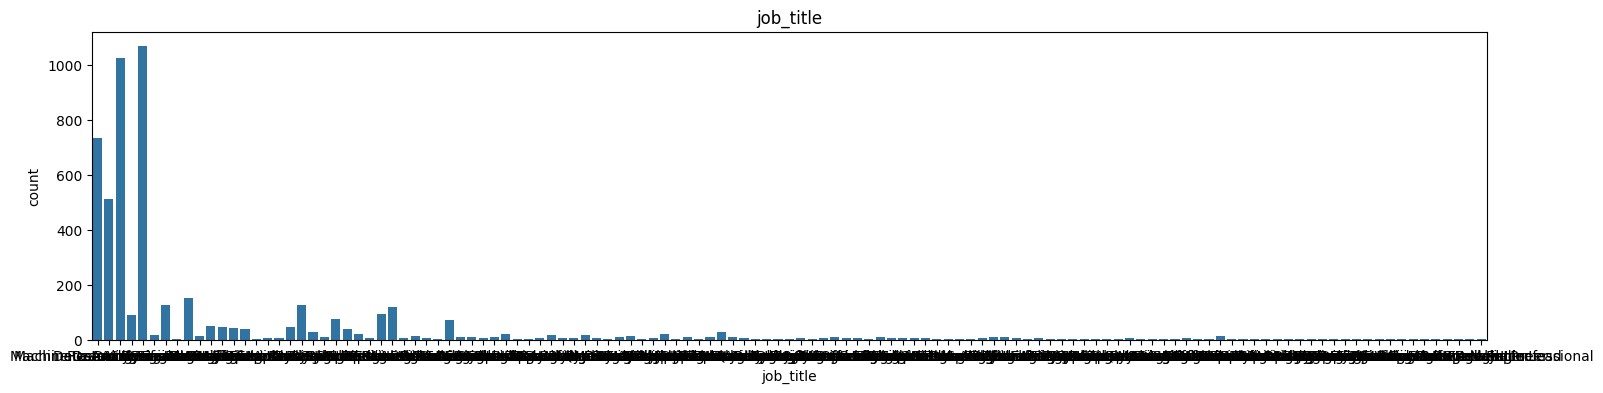

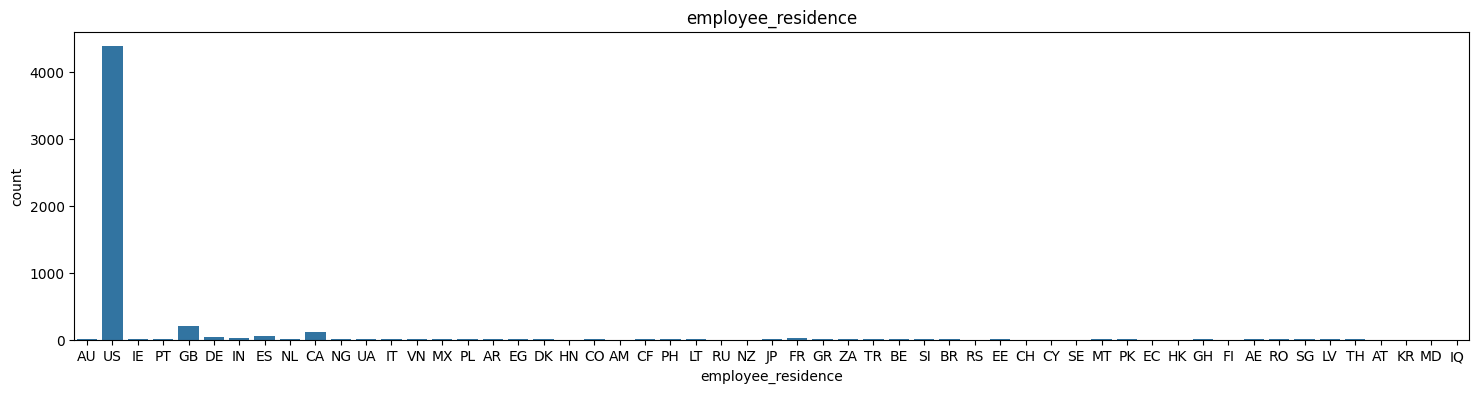

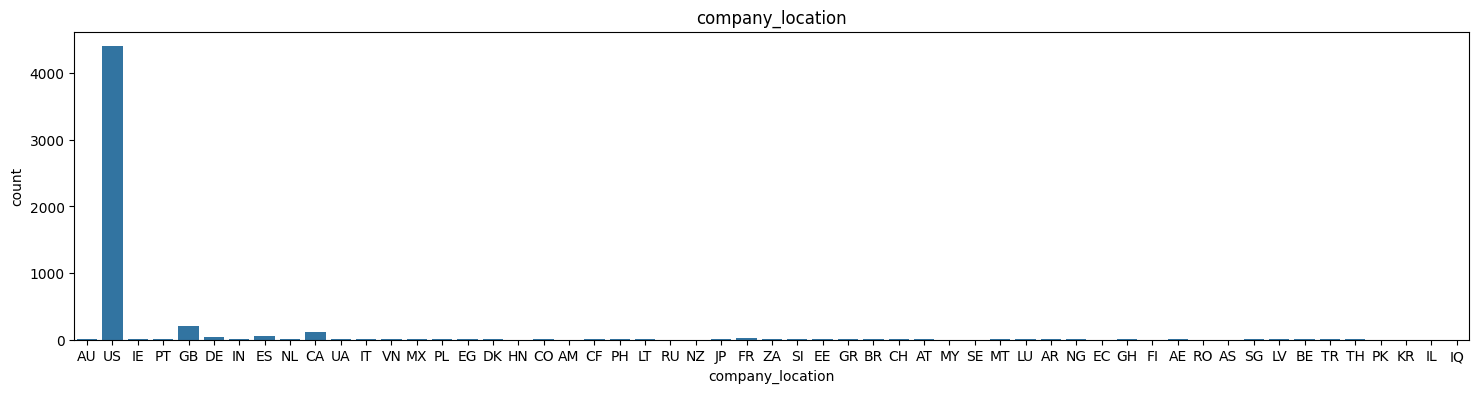

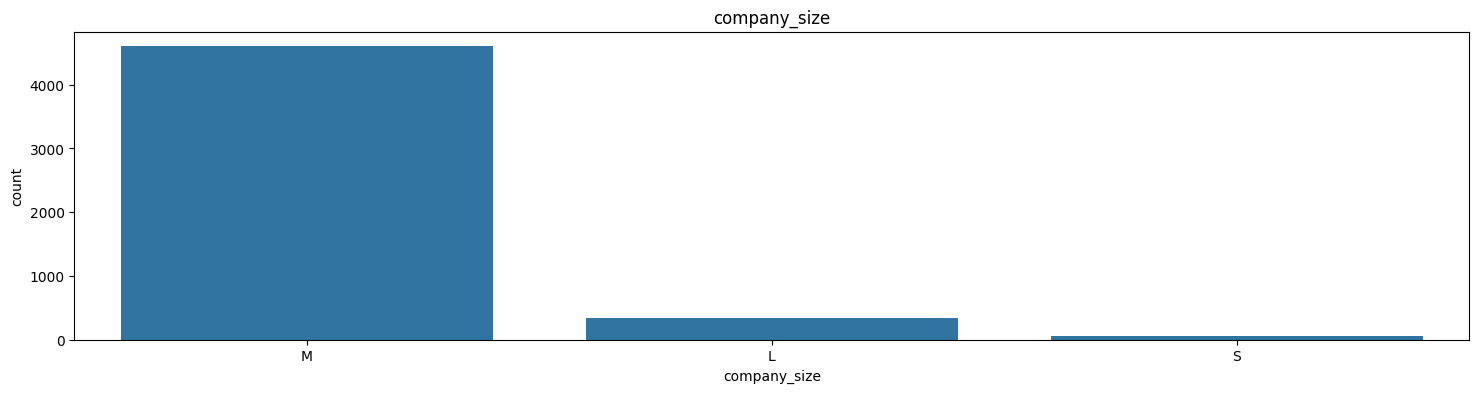

In [89]:
lista_categoricos = ["experience_level", "employment_type", "job_title", "employee_residence", "company_location", "company_size"]

for column in lista_categoricos:
    
    plt.figure(figsize=(18,4))
    sns.countplot(
        data=df,
        x = column
    )
    plt.title(column)
    plt.show()
    

## 4. Análisis de Proporciones de Nulos

En esta sección, analizaremos la proporción de valores nulos en cada columna del DataFrame.

**Instrucción:** Calcula la proporción de valores nulos en cada columna del DataFrame.  Muestra los resultados en forma de tabla y también visualízalos con un gráfico de barras.

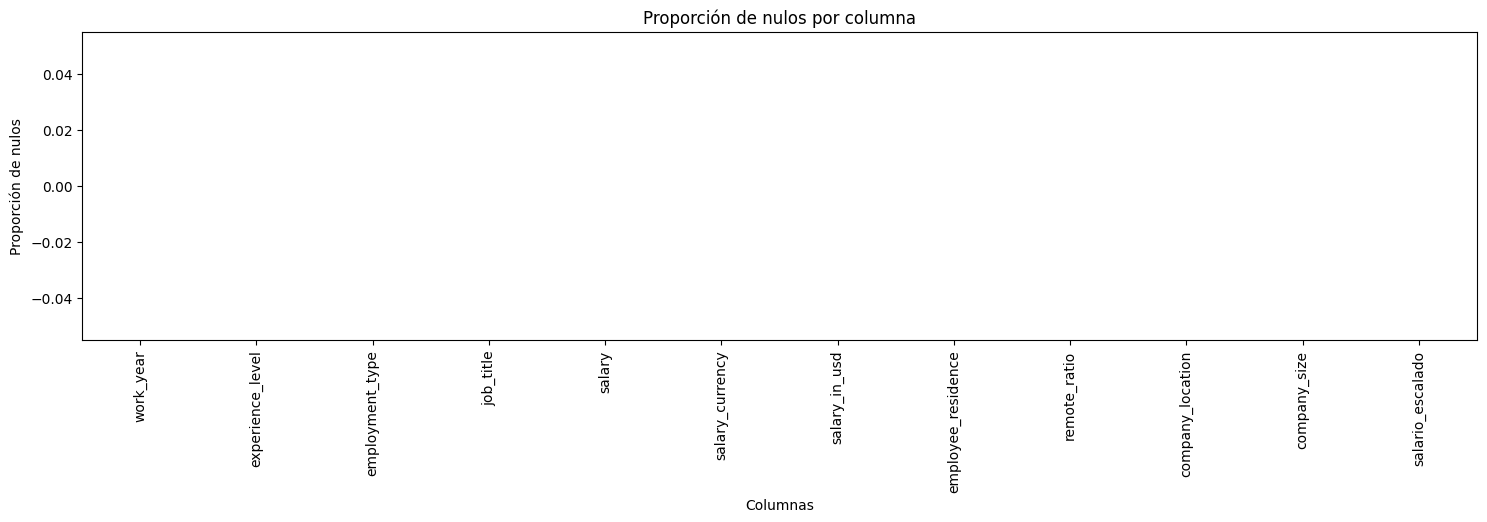

In [90]:
#Proporcion de nulos

# Nos da la proporcion de nulos por columna
null_proportion = df.isnull().mean().reset_index()

# Renombramos las columnas
null_proportion.columns = ["columna", "proporcion_nulos"]

#Mostramos en un gráfico la proporcion de nulos por columna
plt.figure(figsize=(18,4))
sns.barplot(
    data=null_proportion,
    x="columna",
    y="proporcion_nulos"
)

plt.title("Proporción de nulos por columna")
plt.xlabel("Columnas")
plt.ylabel("Proporción de nulos")
plt.xticks(rotation=90)
plt.show()



## 5. Imputación de Datos Nulos

En esta sección, imputaremos los valores nulos en las columnas que lo requieran.  Justifica la elección del método de imputación en cada caso.

### No es necesario imputar nulos ya que no contamos con eso

**Instrucción:** Imputa los valores nulos en las columnas que consideres necesario.  Utiliza el método de imputación que consideres más apropiado para cada caso (media, mediana, moda, valor constante, KNNImputer, etc.).  Documenta y justifica tus decisiones.

## 6. Transformación de Variables

En esta sección, transformaremos las variables que lo requieran para mejorar el análisis.  Por ejemplo, podríamos convertir variables categóricas a numéricas usando one-hot encoding o label encoding.

**Instrucción:** Identifica las variables que podrían beneficiarse de una transformación y aplica la transformación adecuada (one-hot encoding, label encoding, etc.).  Justifica tus decisiones.

In [91]:
# -- De momento no convertiré categoricas a numéricas --

## 7. Normalización y Estandarización de Variables

En esta sección, aplicaremos técnicas de escalado a las variables numéricas. La **normalización** ajusta los valores a un rango entre 0 y 1, mientras que la **estandarización** transforma los datos para que tengan una media de 0 y una desviación estándar de 1.


**Instrucción:** Normaliza la variable `salary_in_usd` usando el método de escalado Min-Max. Crea una nueva columna llamada `salary_in_usd_norm` para almacenar los valores normalizados.

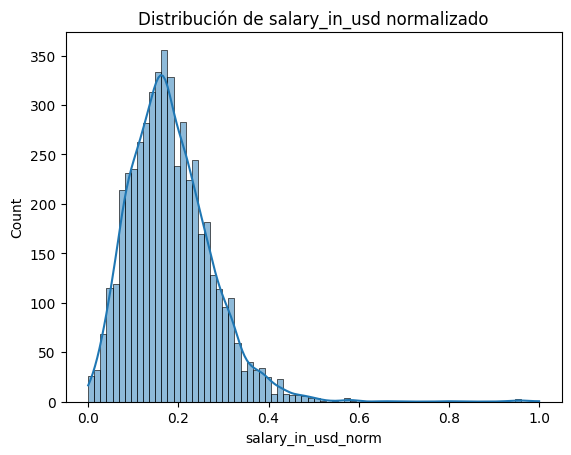

In [92]:
# -- Escribe aquí tu código para la normalización de 'salary_in_usd' --

df["salary_in_usd_norm"] = (df["salary_in_usd"] - df["salary_in_usd"].min()) / (df["salary_in_usd"].max() - df["salary_in_usd"].min())


sns.histplot(
    data=df,
    x="salary_in_usd_norm",
    kde=True
)
plt.title("Distribución de salary_in_usd normalizado")
plt.show()

- Larga cola a la derecha, sesgo positivo, posiblemente outliers
- La mayoria de salarios son relativamente bajos pero ese sesgo influye en la distribucion
- La mayoria de salarios se encuentra en un rango bastate estrecho
- Los salarios altos son muy poco frecuentes
- Los salarios más altos son casos excepcionales, pueden ser puestos de trabajo muy especificos

**Instrucción:** Estandariza la variable `salary_in_usd` creando una nueva columna llamada `salary_in_usd_std`. Utiliza `StandardScaler` de `scikit-learn`.

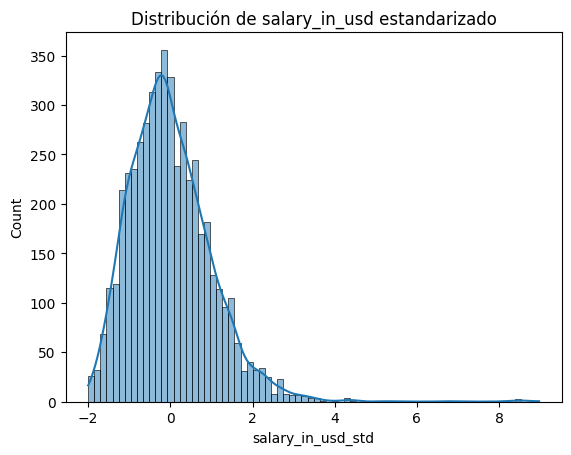

In [93]:
# -- Escribe aquí tu código para la estandarización de 'salary_in_usd' --

# INstancair el objeto StandardScaler
scaler = StandardScaler()

df["salary_in_usd_std"] = scaler.fit_transform(df[["salary_in_usd"]])


sns.histplot(
    data=df,
    x="salary_in_usd_std",
    kde=True
)
plt.title("Distribución de salary_in_usd estandarizado")
plt.show()


- Se confirma lo mencionado anteriormente, un gran sesgo positivo y outliers, se ve hasta inclusive 8 desviaciones estandar

**Pregunta:** ¿Qué ventajas tiene la estandarización sobre la normalización en este caso? ¿En qué situaciones es preferible usar una u otra?


In [94]:
# -- Escribe aquí tu respuesta a la pregunta sobre normalización y estandarización --

"""
    Estandarizacion (centrar en 0): 
        Veo utilidad para detectar outliers facilmente gracias al z-score
        
    Normalización (escalar entre 0 y 1):
         Sirve para comparar datos que tienen diferentes unidades de medida o en escalas distintas
        
"""

'\n    Estandarizacion (centrar en 0): \n        Veo utilidad para detectar outliers facilmente gracias al z-score\n        \n    Normalización (escalar entre 0 y 1):\n         Sirve para comparar datos que tienen diferentes unidades de medida o en escalas distintas\n        \n'

## 8. Análisis de Proporciones

En esta sección, analizaremos las proporciones de las diferentes categorías dentro de las variables categóricas.


**Instrucción:** Para cada variable categórica, calcula la proporción de cada categoría y visualízala con un gráfico de barras o un gráfico circular.

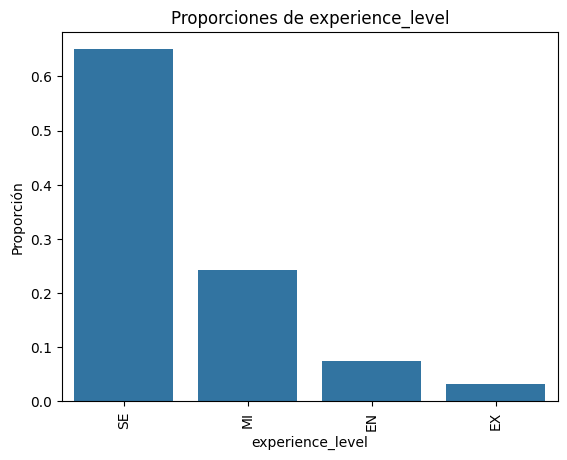

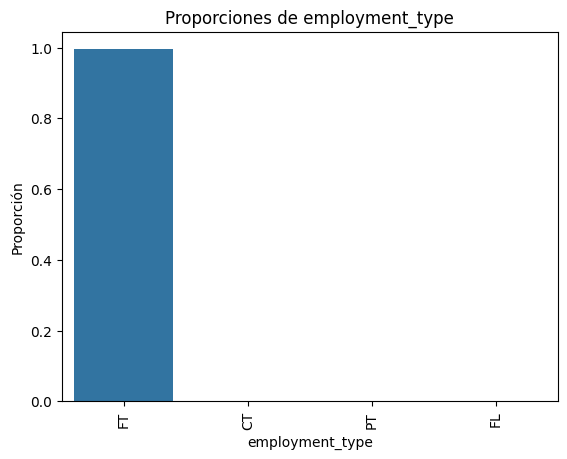

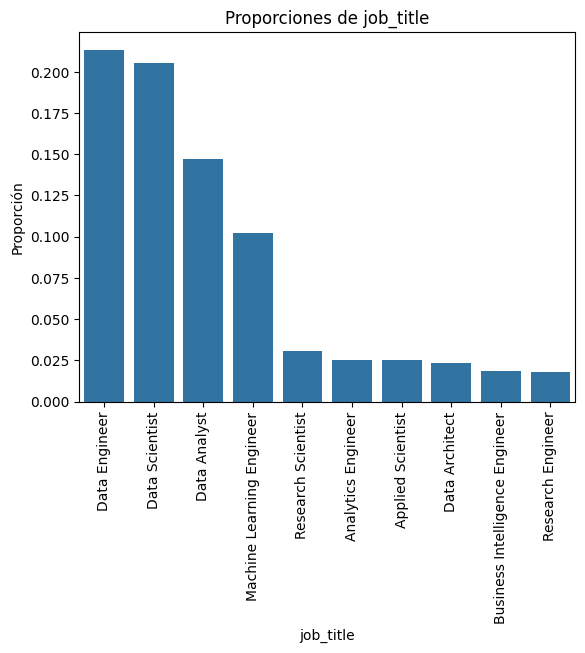

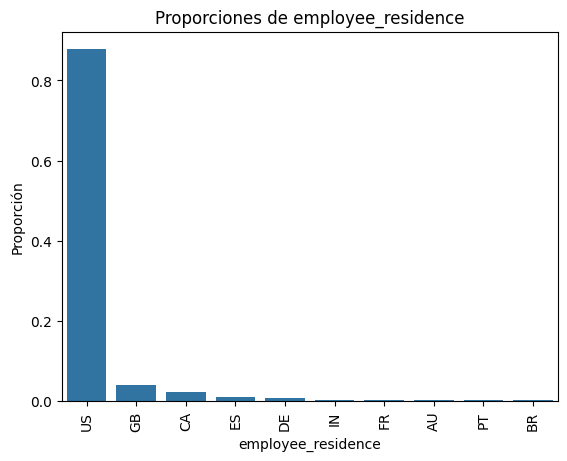

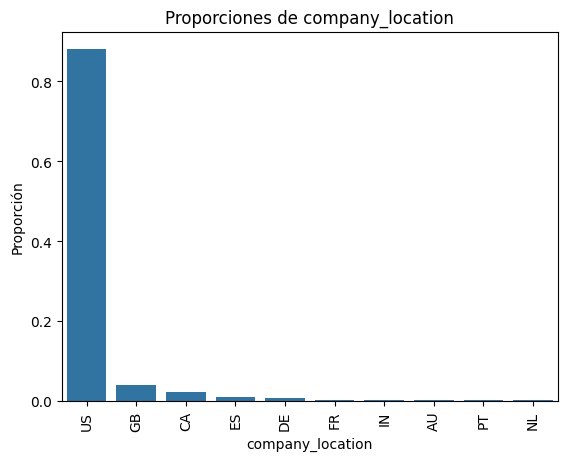

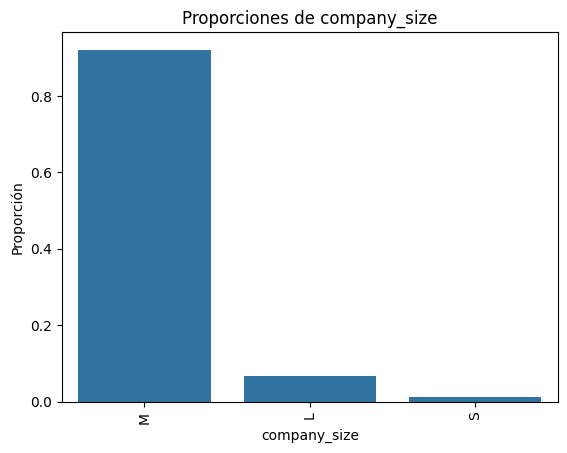

In [95]:
# -- Escribe aquí tu código para el análisis de proporciones --
# Usamos la lista de categorías declarada anteriormente 

for column in lista_categoricos:
    proporciones = df[column].value_counts(normalize=True).head(10) #Pongo 10 para que no se vea tan saturado
    
    sns.barplot(
        x = proporciones.index,
        y = proporciones.values,
    ) 
    
    plt.title(f"Proporciones de {column}")
    plt.xlabel(column)
    plt.ylabel("Proporción")
    plt.xticks(rotation=90)
    plt.show()

#### experience_level:
- Se ve que más del 60% son seniors
#### employment_type:
- Casi el 100% de los empletos son de tiempo completo
#### job_title:
- Los 3 trabajos más presentes son data engineer, data scientist y data analyst. Estos ocupan el 50% de los puestos de trabajo
#### employee_residence:
- Casi el 90% de las residencias son en estados unidos, le sigue el reino unido y canadá, ambos con menos del 10%
#### company_location:
- Al igual que las residencias de los empleados, las empresas están situadas casi en un 90% en estados unidos, le sigue el reino unido y canadá, ambos con menos del 10%
#### company_size:
- Casi el 90% de las empresas son medianas 

## 9. Análisis de Correlación

En esta sección, analizaremos la correlación entre las variables numéricas del conjunto de datos.


**Instrucción:** Calcula la matriz de correlación entre las variables numéricas y visualízala con un mapa de calor (heatmap).

In [96]:
# -- Escribe aquí tu código para el análisis de correlación --

**Instrucción:** Identifica las variables con alta correlación (positiva o negativa).  En el contexto de este conjunto de datos, ¿qué implicaciones puede tener la alta correlación entre dos variables para el análisis o la construcción de modelos predictivos?

In [97]:
# -- Escribe aquí tus comentarios sobre las implicaciones de la alta correlación --

## 10. Imputación de Variables con Alta Correlación

En esta sección, utilizaremos las variables con alta correlación para imputar valores faltantes (si los hay) de forma más precisa, mediante un modelo predictivo (por ejemplo regresión lineal o KNN).

**Instrucción:** Si identificaste variables con alta correlación en la sección anterior, y si alguna de esas variables tiene valores faltantes, utiliza un modelo de regresión lineal o `KNNImputer` para imputar los valores faltantes en función de la variable con la que tiene mayor correlación.  Si no hay variables con alta correlación y valores faltantes, puedes omitir esta sección.

In [98]:
# -- Escribe aquí tu código para la imputación basada en correlación --

## 11. Análisis de Outliers e Imputación de Outliers

En esta sección, identificaremos y trataremos los outliers en las variables numéricas.


**Instrucción:** Utiliza el método del Z-score modificado (MAD) y el método del IQR para identificar outliers en las variables `salary_in_usd`. Puedes usar las variables que creaste en los pasos anteriores `salary_in_usd_std` y `salary_in_usd_norm` respectivamente.


In [99]:
# -- Escribe aquí tu código para la detección de outliers --

# Añadimos a un nuevo dataframe las columnas consideradas como outliers

df_outliers = df.query("salary_in_usd_std > 3 | salary_in_usd_std < -3")

# Eliminamos los outliers del dataframe original 

df = df.query("salary_in_usd_std <= 3 & salary_in_usd_std >= -3")   #otra manera  df = df.loc[(df['salary_in_usd_std'] <= 3) & (df['salary_in_usd_std'] >= -3)]


#Vemos los datos de los outliers
df_outliers.head()

,work_year,experience_level,employment_type,job_title,salary,salary_currency,salary_in_usd,employee_residence,remote_ratio,company_location,company_size,salario_escalado,salary_in_usd_norm,salary_in_usd_std
194,2024,SE,FT,Data Architect,363000,USD,363000,US,0,US,M,0.041014,0.473469,3.196126
461,2024,SE,FT,Analytics Engineer,720000,USD,720000,US,0,US,M,0.083088,0.959184,8.526100
484,2023,SE,FT,ML Engineer,365630,USD,365630,US,0,US,M,0.041324,0.477048,3.235392
619,2023,SE,FT,Data Scientist,370000,USD,370000,US,0,US,M,0.041839,0.482993,3.300635
915,2023,SE,FT,Computer Vision Engineer,351000,USD,351000,US,0,US,M,0.039599,0.457143,3.016967


In [100]:
print(f"Residencia: {df_outliers['employee_residence'].value_counts()}\n")

print(f"Tipo de empleo: {df_outliers['employment_type'].value_counts()}\n")

print(f"Moneda del salario: {df_outliers['salary_currency'].value_counts()}\n")

print(f"Ubicación de la compañia: {df_outliers['company_location'].value_counts()}\n")



Residencia: employee_residence
US    41
Name: count, dtype: int64

Tipo de empleo: employment_type
FT    41
Name: count, dtype: int64

Moneda del salario: salary_currency
USD    41
Name: count, dtype: int64

Ubicación de la compañia: company_location
US    41
Name: count, dtype: int64



## De esta manera nos queda nuestra distribución sin los outliers:

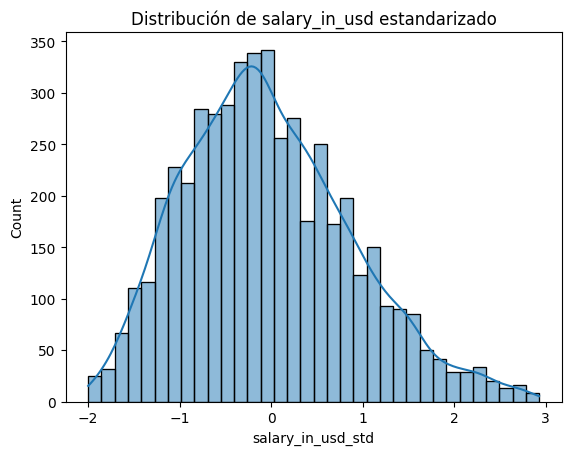

In [101]:

sns.histplot(
    data=df,
    x="salary_in_usd_std",
    kde=True
)
plt.title("Distribución de salary_in_usd estandarizado")
plt.show()

**Instrucción:** Para cada variable, decide si es necesario tratar los outliers y, en caso afirmativo, elige un método de tratamiento (eliminación, imputación con la mediana, winsorización, etc.). Justifica tus decisiones.

**Nota:** Antes de imputar, crea una copia del DataFrame original para mantener los datos originales intactos.  Por ejemplo: `df_tratado = df.copy()`

- Decidí eliminar los outliers y almacenarlos otro dataframe ya que son muy pocos registros en coparación al total.
- Todas las personas que tienen salarios extremadamente altos son residentes de estados unidos, cobran en dolares, sus empleos son de tiempo completo y la ubicacion de las compañias para la que trabajan tambien son de estados unidos

## 12. Análisis Estadístico

En esta sección, realizaremos un análisis estadístico más profundo del conjunto de datos, incluyendo medidas de tendencia central, rangos y desviación estándar.


**Instrucción:** Calcula la media, mediana y moda de las variables `salary_in_usd`.


In [102]:
# -- Escribe aquí tu código para calcular las medidas de tendencia central --

**Instrucción:** Calcula el rango y la desviación estándar de las variables `salary_in_usd`


In [103]:
# -- Escribe aquí tu código para calcular el rango y la desviación estándar --

**Instrucción:** Calcula e imprime el promedio acumulado de la variable `salary_in_usd`

In [104]:
# -- Escribe aquí tu código para calcular el promedio acumulado --


## 13. Análisis con PMF, CDF y PDF

En esta sección, analizaremos las funciones de probabilidad de masa (PMF), distribución acumulada (CDF) y densidad de probabilidad (PDF) para las variables numéricas.


**Instrucción:**  Para la variable `salary_in_usd`:
    - Si la variable es discreta, calcula y grafica la PMF.
    - Si la variable es continua, grafica la PDF usando `sns.kdeplot()`.
    - Calcula y grafica la CDF.


In [105]:
# -- Escribe aquí tu código para el análisis con PMF, CDF y PDF --

## 14. Análisis Univariado

En esta sección, realizaremos un análisis univariado para cada una de las variables del conjunto de datos. Esto implica analizar cada variable de forma independiente, utilizando las visualizaciones y estadísticas descriptivas que hemos calculado en las secciones anteriores.

**Instrucción:** Para cada variable en el conjunto de datos, escribe un breve resumen que incluya:

-   Tipo de variable (numérica, categórica).
-   Medidas de tendencia central (media, mediana, moda).
-   Medidas de dispersión (rango, desviación estándar).
-   Forma de la distribución (simétrica, asimétrica, etc.).
-   Presencia de outliers.
-   Proporción de valores nulos (si los hay).
-   Cualquier otra observación relevante.


In [106]:
# -- Escribe aquí tu análisis univariado para cada variable --

## 15. Análisis Multivariado

En esta sección, realizaremos un análisis multivariado para explorar las relaciones entre las diferentes variables del conjunto de datos.


**Instrucción:** Crea un diagrama de dispersión para visualizar la relación entre `salary_in_usd` y `remote_ratio`.  Interpreta el gráfico.


In [107]:
# -- Escribe aquí tu código para crear el diagrama de dispersión --

**Instrucción:** Crea un gráfico de barras apiladas para visualizar la relación entre `company_size` y `experience_level`. Interpreta el gráfico.


In [108]:
# -- Escribe aquí tu código para crear el gráfico de barras apiladas --

**Instrucción:** Crea un boxplot para visualizar la relación entre `salary_in_usd` y `experience_level`. Interpreta el gráfico.


In [109]:
# -- Escribe aquí tu código para crear el boxplot --

**Instrucción:**  Plantea al menos tres preguntas de investigación adicionales que podrían responderse con un análisis multivariado de este conjunto de datos.  Para cada pregunta, describe brevemente el tipo de análisis que realizarías y qué variables utilizarías.


In [110]:
# -- Escribe aquí tus preguntas de investigación y los análisis propuestos --

## 16. Prueba de Hipotesis

En esta sección, realizaremos una prueba de hipótesis para responder a una pregunta específica sobre los datos.

**Instrucción:**
Imagina que una persona que trabaja en recursos humanos en el sector tecnológico afirma que el salario promedio en USD para los trabajos con el titulo *Data Scientist* es de al menos \$150,000.  Utiliza una prueba de hipótesis para determinar si hay suficiente evidencia para rechazar esta afirmación. Utiliza un nivel de significación del 0.05. Antes de realizar la prueba, segmenta primero tus datos para tener un data frame con la información unicamente de los Data Scientist, luego imputa los valores faltantes en la variable 'salary_in_usd' con la mediana.

**Pasos a seguir:**

1.  Segmentar el DataFrame para obtener solo las filas que correspondan a *Data Scientist*
2.  Imputar los valores faltantes en 'salary_in_usd' con la mediana, en caso de que existan.
3.  Formular la hipótesis nula y alternativa.
4.  Realizar una prueba t de una muestra (utiliza `ttest_1samp` de `scipy.stats`).
5.  Interpretar el valor p y tomar una decisión.

**Escribe tu código y tu interpretación a continuación:**

In [111]:
# -- Escribe aquí tu código para la prueba de hipótesis --
# Paso 1: Segmentar el DataFrame para Data Scientist
df_ds = df[df['job_title'] == 'Data Scientist'].copy() #Crea una copia para no modificar el df original

# Paso 2: Imputar los valores faltantes en 'salary_in_usd' con la mediana (si es necesario)
if df_ds['salary_in_usd'].isnull().sum() > 0:
    median_salary = df_ds['salary_in_usd'].median()
    df_ds['salary_in_usd'].fillna(median_salary, inplace=True)

# Paso 3: Formular las hipótesis
# -- Escribe aquí tus hipótesis --
# H0: mu >= 150000
# H1: mu < 150000

# Paso 4: Realizar la prueba t de una muestra
t_statistic, p_value = ttest_1samp(df_ds['salary_in_usd'], 150000, alternative='less')

print(f"Estadístico t: {t_statistic:.4f}")
print(f"Valor p: {p_value:.4f}")

# Paso 5: Tomar una decisión
alpha = 0.05
if p_value <= alpha:
    print("Rechazamos la hipótesis nula.")
else:
    print("No rechazamos la hipótesis nula.")

NameError: name 'ttest_1samp' is not defined

-- Escribe aquí tu interpretación del resultado de la prueba de hipótesis --

## 17. Conclusiones

En esta sección, resumiremos los hallazgos más importantes del análisis exploratorio de datos y extraeremos conclusiones sobre las características más relevantes que influyen en los salarios en la industria tecnológica.


**Instrucción:** Escribe un resumen de los hallazgos clave de tu análisis, incluyendo:

-   Las variables más relevantes para determinar el salario en USD.
-   Las relaciones más significativas entre las variables.
-   El impacto de los outliers y cómo se manejaron.
-   Las principales conclusiones que se pueden extraer del análisis.
-   Limitaciones del análisis y posibles extensiones.


In [ ]:
# -- Escribe aquí tus conclusiones --

## 18. Reflexión (Opcional)

**Instrucción:** Reflexiona sobre lo que has aprendido en este proyecto. ¿Qué te ha resultado más útil? ¿Qué te ha parecido más desafiante? ¿Cómo podrías aplicar estas técnicas en tus propios proyectos?


In [ ]:
# -- Escribe aquí tu reflexión --